# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entri

[Text(0.5, 0, '')]

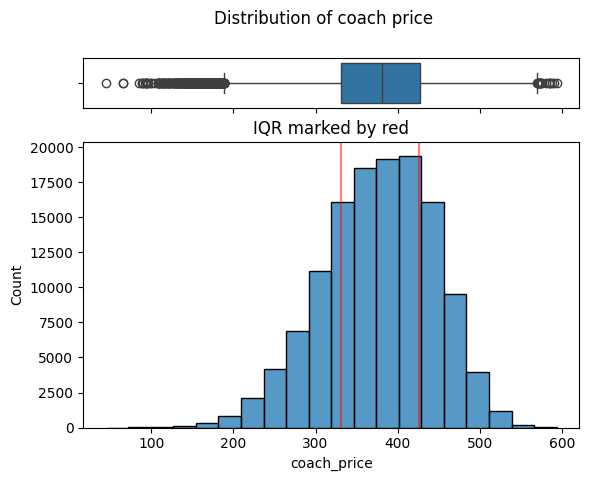

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go

# Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())
print(flight.info())

## Task 1
fig = go.Figure()
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x= flight['coach_price'], orient = 'h', ax = ax_box)
sns.histplot(x= 'coach_price', data=flight, ax = ax_hist, bins= 20)
plt.axvline(x=331, color = 'Red', alpha = 0.5)
plt.axvline(x=426, color = 'Red', alpha = 0.5)
size = '600'
emoji = '&#9992'
text = f"<span style='font-size:{size}px;'>{emoji};</span>"
fig.add_annotation( x= 500,y= 200, xref = 'x', yref= 'y', text = text,  showarrow = False)
plt.suptitle('Distribution of coach price')
plt.title('IQR marked by red')
ax_box.set(xlabel='')


We can see the distribution of the coach price is slightly left skewed. We can see from the box plot and the red lines added to to the histogram that 50% of the tickets cost between 346 and 420 dollars. This sounds like the average price of a ticket if not cheap depending on destination. 
Would be interesting to see if cost price correlates with flight duration/miles: 

Text(0, 0.5, 'Miles')

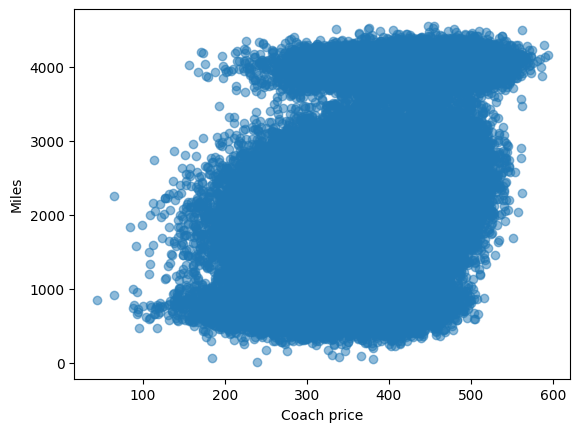

In [73]:
plt.scatter(x= 'coach_price', y = 'miles', data=flight, alpha=0.5)
plt.xlabel('Coach price')
plt.ylabel('Miles')

As we can see here we have a lot of data and its hard to determine if there is a relationship between the variables, instead I'm going to randomly select a sample of the population. 

Text(0, 0.5, 'Miles')

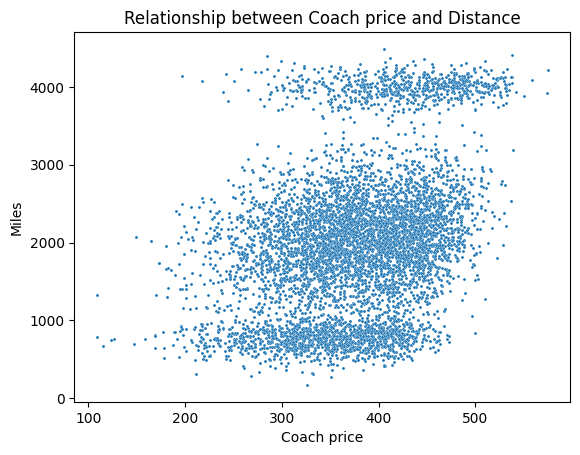

In [74]:

perc = 0.05
subpop_coachprice = flight.sample(n = int(flight.shape[0]*perc))

sns.scatterplot(x=subpop_coachprice['coach_price'], y=subpop_coachprice['miles'], s= 5) # plotting the subpopulation and also making the markers slightly transparent and smaller
plt.title('Relationship between Coach price and Distance')
plt.xlabel('Coach price')
plt.ylabel('Miles')




Text(0.5, 1.0, 'Relationship between coach price and miles with LOWESS line')

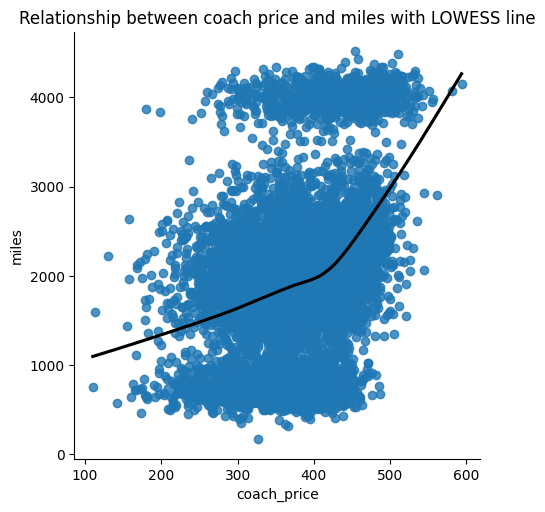

In [4]:
#adding a LOWESS line
sns.lmplot(x='coach_price', y='miles', data = subpop_coachprice, line_kws={'color': 'black'}, lowess=True)
ax = plt.gca()
ax.set_title("Relationship between coach price and miles with LOWESS line")

- The first graph we can see the data points clearly now. There seems to be three distinct groups in the distance that flights will go. There does appear to be a tilt to the the data points suggesting that there is a positive relationship between the variables. 
- In the second graph I added a LOWESS line as opposed to a regression line as I sensed that the data wouldn't be particularly linear. This line doesn't assume linearity and bend to fit the trend of the data. As we can see there is a strong relationship between coach price a miles once the journeys become longer than 2000 miles. 
- For context that 2000 miles would be From Dublin to Athens or the Canary Islands. 
A 3000 miles we start to reach the east coast of North America such as new york and Toronto in Canada.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64
437.115
2.029588534442903


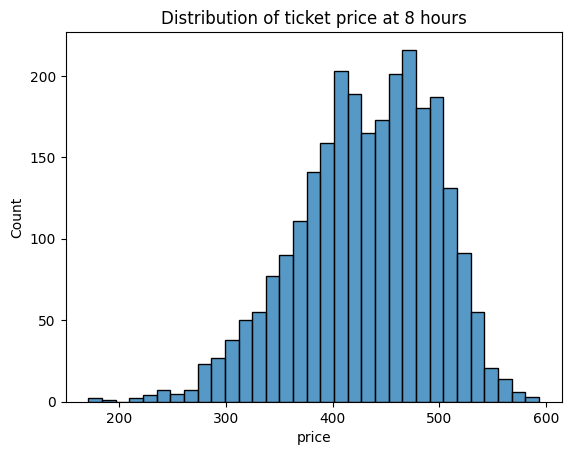

In [23]:
## Task 2
#As above it is generally known that the longer the flight the more expensive the ticket which was reflected in the miles, but lets limit it to 8 hours as per the q. For context this would be flying to the west coast of North America. 

sns.histplot(flight.coach_price[flight.hours == 8])
plt.title('Distribution of ticket price at 8 hours')
plt.xlabel('price')


print(flight.coach_price[flight.hours == 8].describe())
print(np.median(flight.coach_price[flight.hours == 8]))
print(2634/129780 *100)


- There seems to be a few outliers towards the cheaper end and bimodal, but the mean and the 50% mark aren't too different(mean =431.8, 50% = 437) so I don't think they're affecting the spread so much. We can compare this to what we know about current flights and these prices would generally align with the price of a flight to west coast America from Dublin. 
- The cheaper prices could be due to new budget airlines coming into the market for trans atlantic flight or could be a mistake.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64


<Axes: xlabel='delay', ylabel='Count'>

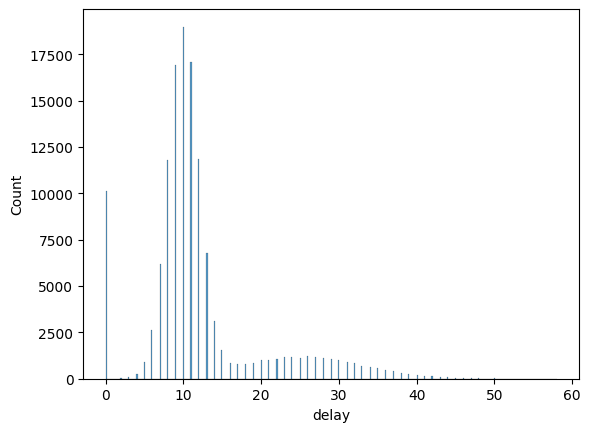

In [37]:
## Task 3
print(flight.delay.describe())
sns.histplot(flight.delay[flight.delay <= 780 ]) # reduced the inclusion to include 75% of the data as above that the graph becomes illegible from the outliers at the higher end.


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

Text(0.5, 1.0, 'Relationship Between Coach Price and First Class Price Colored by Flight Duration')

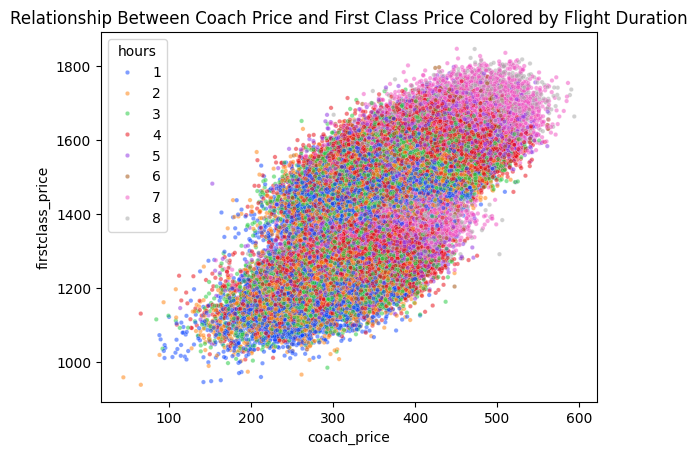

In [56]:
## Task 4
sns.scatterplot(x= flight.coach_price, y =flight.firstclass_price, s = 10, alpha = 0.5, hue = flight.hours, palette='bright')
plt.title('Relationship Between Coach Price and First Class Price Colored by Flight Duration')


In [3]:
flight.hours.min()

1

We can see here that there is positive relationship between the two variables. As the cost of either ticket goes up so does the other. Price increase could be due to the duration of the flight as we can see with the colour of the dots, the pink marking 7 hour flights tends towards the upper right of the graph. 

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

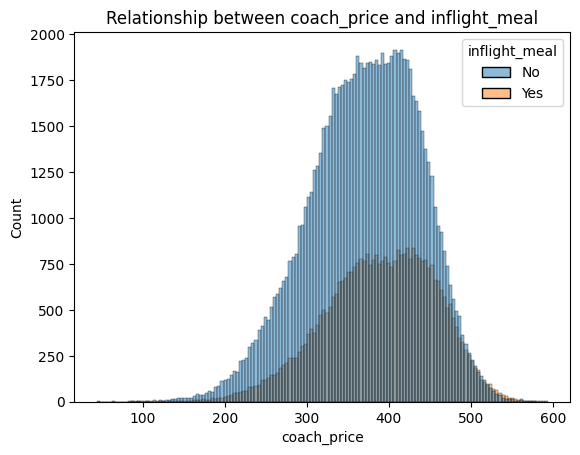

None


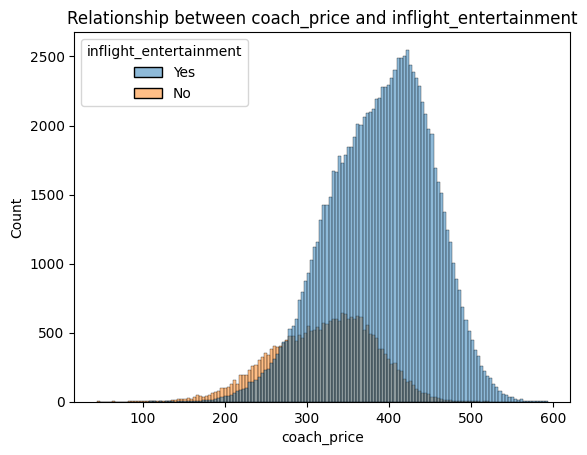

None


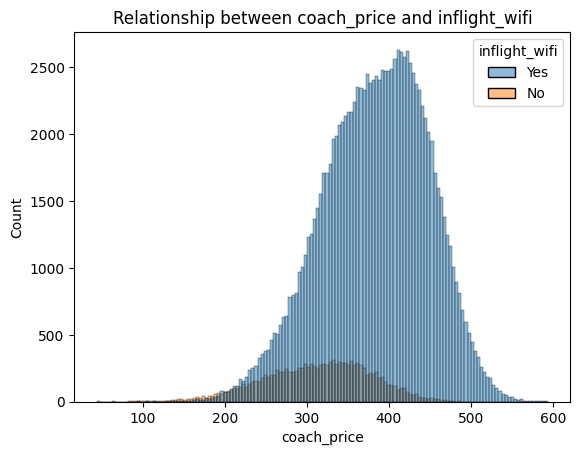

None


In [69]:
## Task 5
def create_hist(x_variable, y_variable, dataframe): 
    if (not isinstance(x_variable,str)):
        raise Exception('Please input x and y variable as string name of column')
    sns.histplot(x = x_variable, data=dataframe, hue = y_variable)
    plt.title(f'Relationship between {x_variable} and {y_variable}')
    plt.xlabel(f'{x_variable}')
    return plt.show()
    
print(create_hist('coach_price', 'inflight_meal', flight))
print(create_hist('coach_price', 'inflight_entertainment', flight))
print(create_hist('coach_price','inflight_wifi', flight))


I created a function to save my printing it out three times, also added a raise error so the correct format of column selection would be used for this function. We can see that the inflight meal doesn't seem to affect the price of the ticket. While inflight entertainment and wifi likely do. Its also interesting to note inflight entertainment and wifi is nearly ubiquitous on flights with more flights having these extras than not. 

6. How does the number of passengers change in relation to the length of flights?

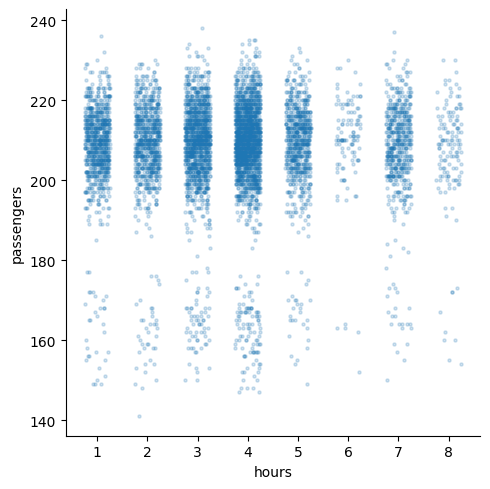

<Figure size 640x480 with 0 Axes>

In [75]:
## Task 6

sns.lmplot(x = "hours", y = "passengers", data = subpop_coachprice, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False) #initially plotted with all data points but was too many
plt.show()
plt.clf()

Flights always tend to have between 200-220 passengers on board.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

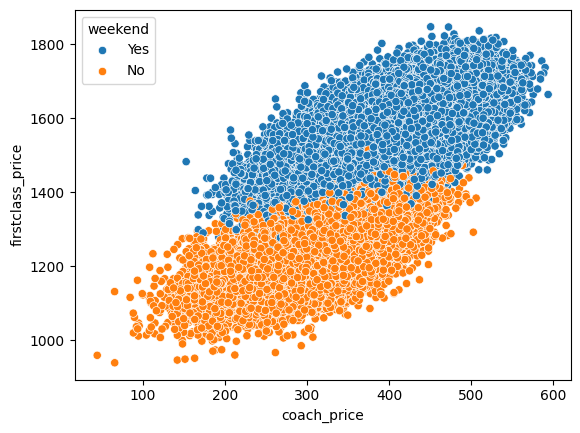

In [77]:
## Task 7
sns.scatterplot(x = flight.coach_price, y = flight.firstclass_price, hue = flight. weekend)
plt.show()


There is a clear distinction between flight price and weekend journeys. 

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

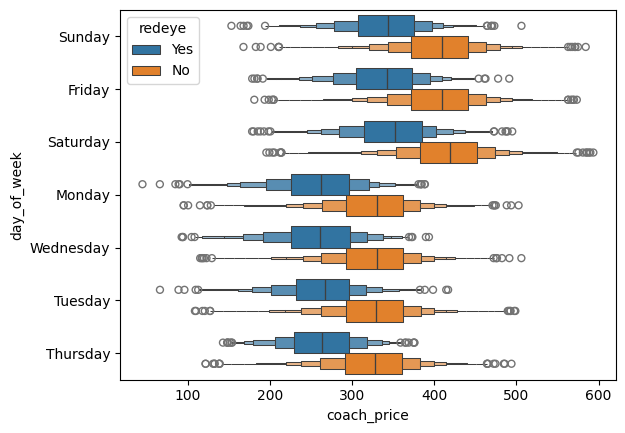

In [80]:
## Task 8
sns.boxenplot(x= flight.coach_price, y= flight.day_of_week, hue = flight.redeye)
plt.show()



